## **<span style="color:#023e8a;font-size:200%"><center>Indian Startup Funding</center></span>**
## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">By: Yicheng Jiang, Bhagirath Bhardwaj, Agnes Shih, Paul Seiters, and Siddharth Bookinkere</span></center>**

# **<span id="Project" style="color:#023e8a;">Project and Dataset Overview</span>**

Harold is a very traditional financial money manager from the USA, investing almost exclusively in the US. After the US economys growth trajectory looked bleak and the FED predicted GDP growth to linger below a mere 2% annually, his clients have been running from our investment products. Where are they all going? After booking a tee time with one of our long-time clients, he heard some adolescents with smartphones talking about the start-up scene in India. There were wild tales about startups with valuations beyond $1B, called unicorns. Apparently, there was not a hint of a slowing economy over there. Is it time to go international? After multiple people confirmed the start-up hype in India, he concluded that it is time to get ourselves a snapshot of what is going on in India. Who is investing? Where are they investing? And most importantly, which companies are they investing in? 

As a team, we perform data cleaning, exploratory data analysis, and finally, create a visualization in Tableau. Also, we chose the Indian Startup Funding dataset collected from multiple sources because of the varied types of funding covered, the sizable number of observations, and the time coverage from 2015 until May 2022, including the Covid-19 phase.

1.   [Indian Startup Funding & Investment Chart [2015-2021]](https://trak.in/india-startup-funding-investment-2015/)
2.   [Indian Startups - Funding & Investors Data [2018-2021]](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data)
4.   [Indian Startups - Funding Data [2022]](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data-januarymay-2022)
5.   [Funding details of the startups in India](https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-funding)
6.   [Cleaned Dataset from Github only for Funding calculation purpose and Dates](https://github.com/Satyampd/Startups-in-India-EDA/blob/master/dataset.csv)


> In this project 3 datasets created for different purposes; Raw data from Kaggle in India_Funding data cleaning, union, etc. Funding_Calculation created base on Github data source for EDA analysis (AVG,SUBSTRING based on Funding, etc..). Finally Founding_Year created to calculate difference between year of funding and founding year purpose

**Difference among `India_Funding_AllYear`, `Funding_Calculation`, and `Founding_Year`**

| Table Name      | Brief Description | Characteristic, Data type   |
| ----------- | ----------------  | ----------- |
| `India_Funding_AllYear`      |  Most populated table from Kaggle. | Data is inconsistent with investment amounts with mixture of `INR` and `USD` with no programmatic method to resolve |
| `Funding_Calculation`   | Dataset retrieved from Github, with correct investment amount in `USD`.  | Joining `Funding_Calculation` and `India_Funding_AllYear` degraded data quality, hence they were not joined through Union |
| `Founding_Year` | Table Created based on `India_Funding_AllYear` | Calculate the difference between founding year and funding year. |

**I. India_Funding_AllYear Table**

| Column      | Brief Description | Characteristic, Data type   |
| ----------- | ----------------  | ----------- |
| `UUID`      |  Randomly generated using `GENERATE_UUID()` bigquery function      |  String, Unique, Primary Key           |
| `Investors`   | Investor Name, usually an individual or a firm            |  String, multiple-values |
| `Funding_Year` | Year the start up was funded | Date |
| `Company_Brand` | Name of the startup | String, Not null |
| `Headquarter` | Location in City, Province where the startup was founded | String |
| `Stage` | Funding Round stage of the Startup, further described below* | String |
| `What_it_does` | Brief description about start-up | String |
| `USD_Amount` | Amount in USD funded per investment round | String |
| `Total_USD_Amount` | Calculated based on USD_Amount data | Integer (Data from github) |


**II. Funding_Calculation**

| Column      | Brief Description | Characteristic, Data type   |
| ----------- | ----------------  | ----------- |
| `PUID`      |  Randomly generated using `GENERATE_UUID()` bigquery function      |  String, Unique, Primary Key           |
| `Startup Name`   | Name of the startup  | String, Not null |
| `IndustryVertical` | Industry of the business | String |
| `SubVertical` | business lines or sectors | String |
| `Date` | Date the start up was funded | Date  |
| `CityLocation` | Location in City, Province where the startup was founded | String |
| `Investment Type` | Type of the investment for funding rounds (Not cleaned), refer to Investment Stage | String |
| `InvestmentStage` | New Funding Round stage of the Startup,changed based on Investment Type* | String |
| `What_it_does` | Brief description about start-up | String |
| `Amount_USD` | Amount in USD funded per investment round | Integer |
| `AmountInUSD` | Calculated and cleaned based on Amount_USD data | Integer |
| `UUID` | Foreign Key to connect India_Founding_AllYear Table  | String  |
| `UID` | Foreign Key to connect Founding_Year Table  | String  |

**III. Founding_AllYear**

| Column      | Brief Description | Characteristic, Data type   |
| ----------- | ----------------  | ----------- |
| `UID`      |  Combination of Company Name and Founding Year |  String, Unique, Primary Key           |
| `Company Name`   | Name of the startup  | String, Not null |
| `Founding Year` | Year of Company being founded | Integer |
| `Funding_Year` | Year of Company being funded | Integer |
| `Year_Diff` | Calculated base on Founding Year - Funding Year | Integer  |
| `UUID` | Foreign Key to connect India_Founding_AllYear Table | Integer  |
| `UID` | Foreign Key to connect Founding_Year Table  | String  |

**What is an investment stage?**
 
*   Many companies have to complete a number of fundraising rounds before getting to the initial public offering (IPO) stage.
*   These fundraising rounds allow investors to invest money into a growing company in exchange for equity/ownership.
*   The initial investment—also known as seed funding—is followed by various rounds, known as **Series A, B, and C**.
*  A new valuation is done at the time of each funding round.
Valuations are determined by various factors, including market size, company potential, current revenues, and management.

**ERD Diagram**
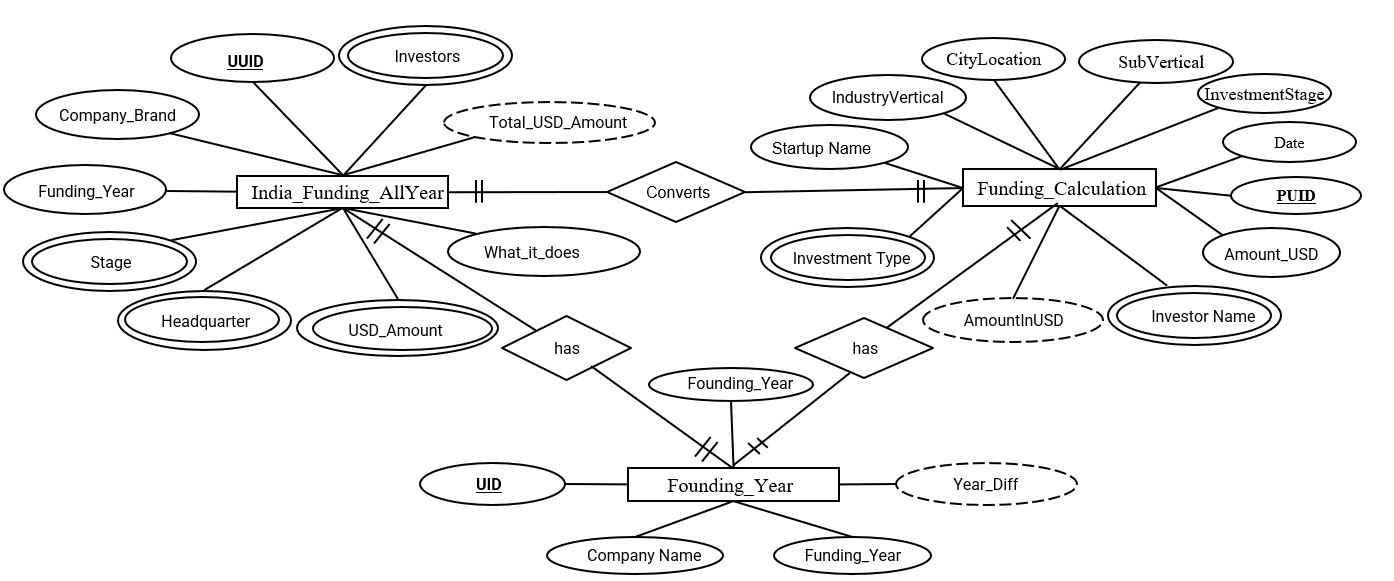

**Data Structure with Primary Keys and Foreign Keys**
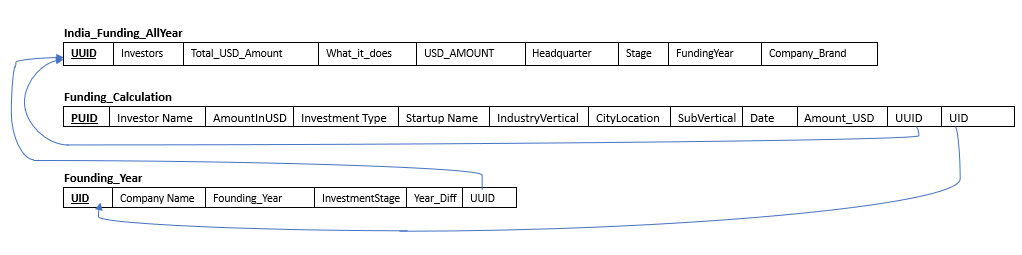

>Above design is in most ideal case, since we pull data from different sourses to fix the data quality issue that exist in `India_Funding_AllYear`; in reality, the `LEFT OUTER JOIN` or `INNER JOIN` did not perform well.